In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib.image import imread
import seaborn as sns

In [2]:
source_dir = '/home/souvik/GitLab/ML/DATA/face-mask-12k-images-dataset/'
test_path = os.path.join(source_dir, 'Test')
train_path = os.path.join(source_dir, 'Train')
valid_path = os.path.join(source_dir, 'Validation')

In [3]:
x = []
y = []
val_max = []
val_min = []

In [4]:
for folder in os.listdir(test_path):
    for pic in os.listdir(os.path.join(test_path, folder)):
        dim1, dim2, _ = imread(os.path.join(test_path, folder, pic)).shape
        x.append(dim1)
        y.append(dim2)

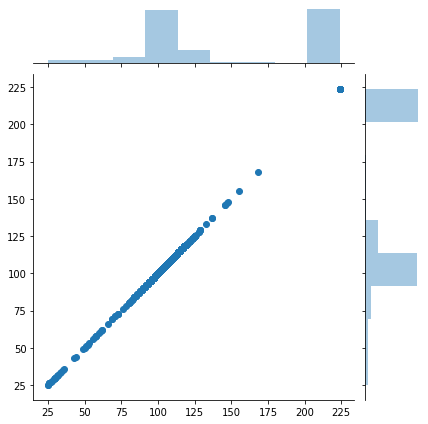

In [5]:
sns.jointplot(x, y)

In [6]:
np.mean(x), np.mean(y)

(151.07762096774192, 151.07762096774192)

In [7]:
np.median(x),  np.median(y)

(115.0, 115.0)

In [8]:
img_shape = (30, 30, 3)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               fill_mode='nearest', # Fill in missing pixels with the nearest filled value
                              brightness_range=(0.2, 1)
                              )

In [11]:
image_gen.flow_from_directory(train_path)

Found 10000 images belonging to 2 classes.


In [12]:
image_gen.flow_from_directory(test_path)

Found 992 images belonging to 2 classes.


In [13]:
image_gen.flow_from_directory(valid_path)

Found 800 images belonging to 2 classes.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, InputLayer

In [15]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Flatten(input_shape=[30, 30, 3]))
# model.add(InputLayer(input_shape=(64*30*30*3)))
# model.add(Dense(900, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2022-08-17 00:00:50.546223: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-08-17 00:00:50.567508: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2419200000 Hz
2022-08-17 00:00:50.568279: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x56546229ca90 executing computations on platform Host. Devices:
2022-08-17 00:00:50.568304: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2700)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                43216     
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 43,233
Trainable params: 43,233
Non-trainable params: 0
_________________________________________________________________


In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [18]:
batch_size = 64

In [19]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=img_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 10000 images belonging to 2 classes.


In [20]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=img_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 992 images belonging to 2 classes.


In [21]:
valid_image_gen = image_gen.flow_from_directory(valid_path,
                                               target_size=img_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 800 images belonging to 2 classes.


In [22]:
test_image_gen

In [23]:
train_image_gen.class_indices

{'WithMask': 0, 'WithoutMask': 1}

In [24]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
157/157 [==============================] - 19s 119ms/step - loss: 0.5937 - accuracy: 0.6399 - val_loss: 0.4723 - val_accuracy: 0.8629
Epoch 2/20
157/157 [==============================] - 16s 105ms/step - loss: 0.4876 - accuracy: 0.7620 - val_loss: 0.3953 - val_accuracy: 0.8538
Epoch 3/20
157/157 [==============================] - 17s 106ms/step - loss: 0.4597 - accuracy: 0.7809 - val_loss: 0.3442 - val_accuracy: 0.8921
Epoch 4/20
157/157 [==============================] - 16s 105ms/step - loss: 0.4510 - accuracy: 0.7831 - val_loss: 0.3567 - val_accuracy: 0.8851
Epoch 5/20
157/157 [==============================] - 17s 106ms/step - loss: 0.4374 - accuracy: 0.7898 - val_loss: 0.3294 - val_accuracy: 0.8952
Epoch 6/20
157/157 [==============================] - 17s 106ms/step - loss: 0.4290 - accuracy: 0.7954 - val_loss: 0.3189 - val_accuracy: 0.9012
Epoch 7/20
157/157 [==============================] - 16s 104ms/step - loss: 0.4150 - accuracy: 0.8000 - val_loss: 0.2995 - val_ac

In [25]:
metrics = pd.DataFrame(model.history.history)

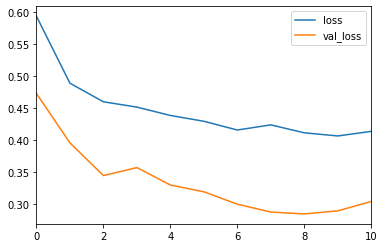

In [26]:
metrics[['loss', 'val_loss']].plot()

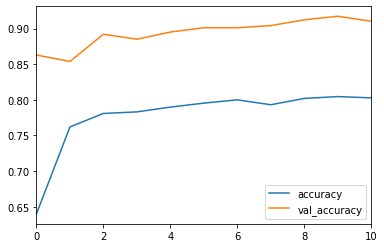

In [27]:
metrics[['accuracy', 'val_accuracy']].plot()

In [28]:
model.evaluate_generator(test_image_gen)

[0.3085070289671421, 0.9133065]

In [29]:
pred = model.predict_generator(test_image_gen)

In [30]:
predictions_test = pred > 0.5

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_image_gen.classes, predictions_test))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       483
           1       0.87      0.98      0.92       509

    accuracy                           0.92       992
   macro avg       0.93      0.92      0.92       992
weighted avg       0.92      0.92      0.92       992



In [32]:
confusion_matrix(test_image_gen.classes, predictions_test)

array([[409,  74],
       [  8, 501]])

In [33]:
pred_val = model.predict_generator(valid_image_gen)

In [34]:
model.evaluate_generator(valid_image_gen)

[0.31036268977018505, 0.91375]

In [35]:
predictions_val = pred_val > 0.5

In [36]:
print(classification_report(valid_image_gen.classes, predictions_val))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90       400
           1       0.86      0.97      0.91       400

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.90       800
weighted avg       0.91      0.91      0.90       800



In [37]:
confusion_matrix(valid_image_gen.classes, predictions_val)

array([[337,  63],
       [ 13, 387]])

In [38]:
from tensorflow.keras.preprocessing import image

In [39]:
my_image = image.load_img('/home/souvik/GitLab/ML/DATA/face-mask-12k-images-dataset/Validation/WithoutMask/50.png', target_size=img_shape)

In [40]:
my_image

In [41]:
my_image_arr = image.img_to_array(my_image).reshape(1, 30, 30, 3)

In [42]:
model.predict(my_image_arr)

array([[1.]], dtype=float32)

In [43]:
from tensorflow.keras.models import load_model

In [44]:
model.save(os.path.join(os.getcwd(),'mask_id_ann.h5'))

In [45]:
os.getcwd()

'/home/souvik/GitLab/ML/CNNs'

In [46]:
from tensorflow.keras.models import load_model

In [47]:
import tensorflow as tf

In [48]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
# converter.target_spec.supported_types = [tf.float16]
tflite_model = converter.convert()

open('mask_id_tiny_ann.tflite', 'wb').write(tflite_model)

2022-08-17 00:04:01.786936: I tensorflow/core/grappler/devices.cc:60] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA support)
2022-08-17 00:04:01.787067: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2022-08-17 00:04:01.788727: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:716] Optimization results for grappler item: graph_to_optimize
2022-08-17 00:04:01.788759: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:718]   function_optimizer: function_optimizer did nothing. time = 0.003ms.
2022-08-17 00:04:01.788764: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:718]   function_optimizer: function_optimizer did nothing. time = 0ms.
2022-08-17 00:04:01.810427: I tensorflow/core/grappler/devices.cc:60] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA support)
2022-08-17 00:04:01.810564: I tensorflo

44616